In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
working_dir = os.getcwd()
print(working_dir)
# find the parent directory
parent_dir1 = os.path.dirname(working_dir)
print(parent_dir1)

parent_dir2 = os.path.dirname(parent_dir1)
print(parent_dir2)

parent_dir3 = os.path.dirname(parent_dir2)
print(parent_dir3)

data_folder = parent_dir3 + '/data'
print(data_folder)

folder_path = os.path.join(data_folder, 'epoch_20SGD_GPU')

# Load data
test_acc = np.load(os.path.join(folder_path, 'test_acc.npy'), allow_pickle=True)
train_acc = np.load(os.path.join(folder_path, 'train_acc.npy'), allow_pickle=True)
train_loss = np.load(os.path.join(folder_path, 'train_l.npy'), allow_pickle=True)
time_forward = np.load(os.path.join(folder_path, 'time_forward.npy'), allow_pickle=True)
time_round = np.load(os.path.join(folder_path, 'time_round.npy'), allow_pickle=True)
time_epoch = np.load(os.path.join(folder_path, 'time_epoch.npy'), allow_pickle=True)
energy_epoch = np.load(os.path.join(folder_path, 'energy_epoch.npy'), allow_pickle=True)

print('Test accuracy: ', test_acc)
print('Train accuracy: ', train_acc)
print('Test loss: ', train_loss)
print('Time forward: ', time_forward)
print('Time round: ', time_round)
print('Time epoch: ', time_epoch)
print('Energy epoch: ', energy_epoch)

/Users/dtjgp/Learning/Thesis/GreenAI/Alexnet_linux/code/GPU_nvidia-smi/SGD
/Users/dtjgp/Learning/Thesis/GreenAI/Alexnet_linux/code/GPU_nvidia-smi
/Users/dtjgp/Learning/Thesis/GreenAI/Alexnet_linux/code
/Users/dtjgp/Learning/Thesis/GreenAI/Alexnet_linux
/Users/dtjgp/Learning/Thesis/GreenAI/Alexnet_linux/data
Test accuracy:  [0.7188 0.7845 0.8137 0.84   0.8486 0.8553 0.859  0.8722 0.8793 0.8786
 0.8787 0.8808 0.8894 0.8828 0.8973 0.8948 0.8947 0.8992 0.9011 0.8884]
Train accuracy:  [[0.125      0.1171875  0.10416667 ... 0.4969553  0.49739583 0.49786667]
 [0.7578125  0.73046875 0.72916667 ... 0.74901298 0.74903178 0.74913333]
 [0.7890625  0.77734375 0.7734375  ... 0.79319459 0.7933527  0.79338333]
 ...
 [0.9453125  0.9140625  0.91666667 ... 0.90417559 0.90411325 0.90413333]
 [0.8984375  0.88671875 0.89322917 ... 0.9061329  0.90623331 0.90625   ]
 [0.9609375  0.9296875  0.93489583 ... 0.90820731 0.90821982 0.90813333]]
Test loss:  [[2.3056109  2.3040967  2.30467168 ... 1.350907   1.3496936

#### test_acc

In [3]:
test_acc

array([0.7188, 0.7845, 0.8137, 0.84  , 0.8486, 0.8553, 0.859 , 0.8722,
       0.8793, 0.8786, 0.8787, 0.8808, 0.8894, 0.8828, 0.8973, 0.8948,
       0.8947, 0.8992, 0.9011, 0.8884])

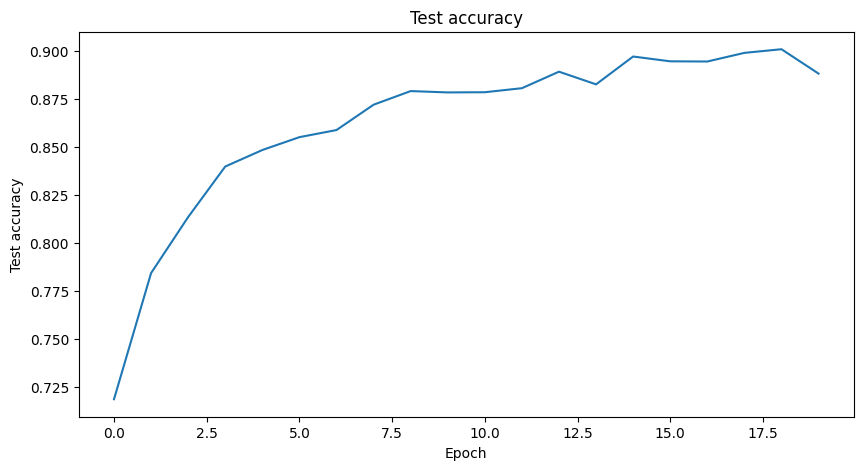

In [4]:
# plot test accuracy
plt.figure(figsize=(10, 5))
plt.plot(test_acc)
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.title('Test accuracy')
plt.show()

#### train_acc

In [5]:
train_acc

array([[0.125     , 0.1171875 , 0.10416667, ..., 0.4969553 , 0.49739583,
        0.49786667],
       [0.7578125 , 0.73046875, 0.72916667, ..., 0.74901298, 0.74903178,
        0.74913333],
       [0.7890625 , 0.77734375, 0.7734375 , ..., 0.79319459, 0.7933527 ,
        0.79338333],
       ...,
       [0.9453125 , 0.9140625 , 0.91666667, ..., 0.90417559, 0.90411325,
        0.90413333],
       [0.8984375 , 0.88671875, 0.89322917, ..., 0.9061329 , 0.90623331,
        0.90625   ],
       [0.9609375 , 0.9296875 , 0.93489583, ..., 0.90820731, 0.90821982,
        0.90813333]])

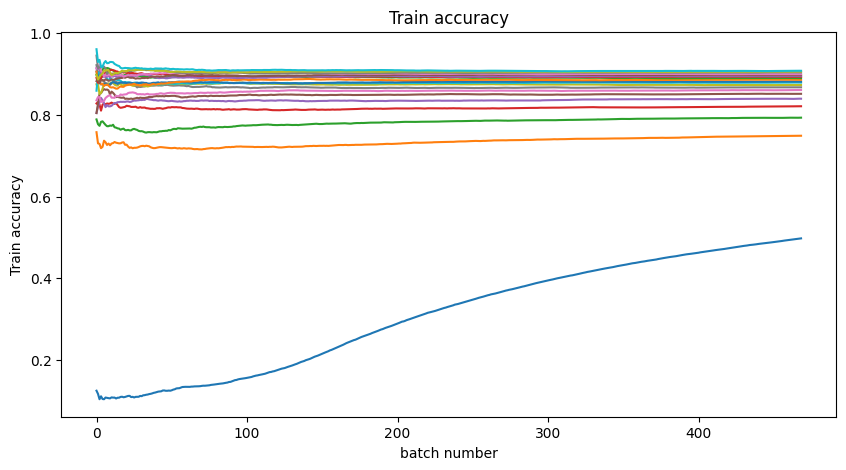

In [6]:
# plot train accuracy of each epoch in one figure
plt.figure(figsize=(10, 5))
for i in range(len(train_acc)):
    plt.plot(train_acc[i])
plt.xlabel('batch number')
plt.ylabel('Train accuracy')
plt.title('Train accuracy')
plt.show()

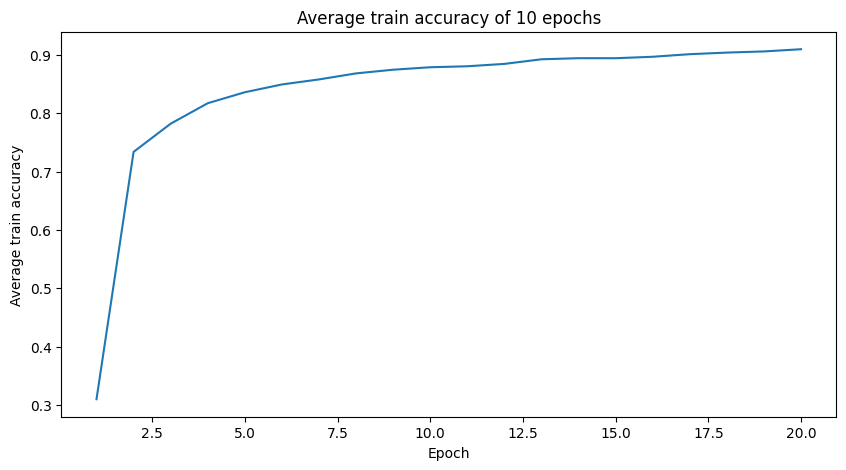

In [7]:
# calculate average train accuracy of each epoch
train_acc_mean = []
for i in range(len(train_acc)):
    train_acc_mean.append(np.mean(train_acc[i]))
train_acc_mean

# plot average train accuracy of each epoch
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1,train_acc.shape[0]+1),train_acc_mean)
plt.xlabel('Epoch')
plt.ylabel('Average train accuracy')
plt.title('Average train accuracy of 10 epochs')
plt.show()

#### train_loss

In [8]:
train_loss

array([[2.3056109 , 2.3040967 , 2.30467168, ..., 1.350907  , 1.34969361,
        1.34841576],
       [0.65672696, 0.73926541, 0.76970746, ..., 0.67171717, 0.67167459,
        0.67160141],
       [0.54829586, 0.67033029, 0.64967072, ..., 0.55157289, 0.55139372,
        0.55137806],
       ...,
       [0.16689235, 0.23190007, 0.25557542, ..., 0.26232499, 0.26242346,
        0.26250126],
       [0.25851586, 0.29184011, 0.29376366, ..., 0.25621074, 0.2559814 ,
        0.25600791],
       [0.14485477, 0.19575122, 0.18272521, ..., 0.25010702, 0.24995843,
        0.25013051]])

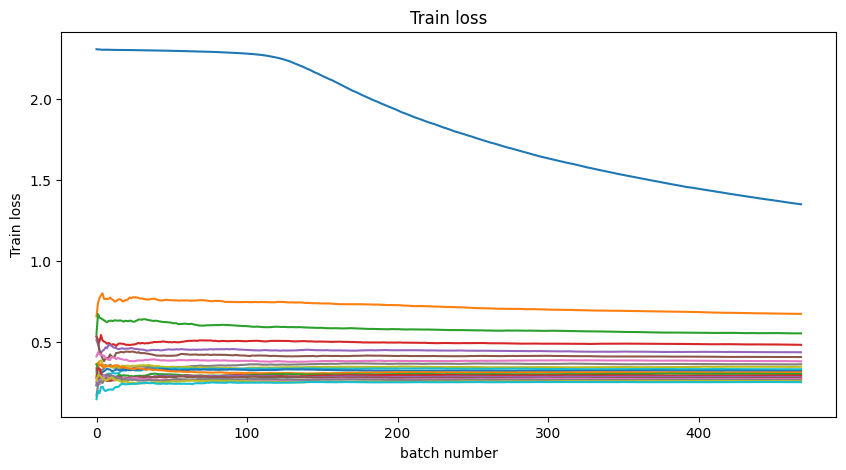

In [9]:
# plot train loss of each epoch in one figure
plt.figure(figsize=(10, 5))
for i in range(len(train_loss)):
    plt.plot(train_loss[i])
plt.xlabel('batch number')
plt.ylabel('Train loss')
plt.title('Train loss')
plt.show()

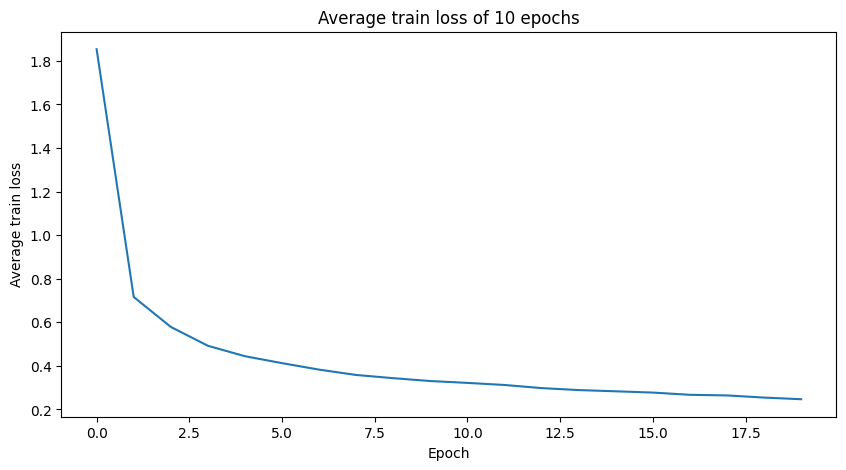

In [10]:
# calculate average train loss of each epoch
train_loss_mean = []
for i in range(len(train_loss)):
    train_loss_mean.append(np.mean(train_loss[i]))
train_loss_mean

# plot average train loss of each epoch
plt.figure(figsize=(10, 5))
plt.plot(train_loss_mean)
plt.xlabel('Epoch')
plt.ylabel('Average train loss')
plt.title('Average train loss of 10 epochs')
plt.show()

#### time_forward

In [11]:
time_forward

array([[0.59877086, 0.10500121, 0.05142021, 0.08697772, 0.04584932,
        0.00897074],
       [0.28587508, 0.09093213, 0.04961443, 0.07586479, 0.03646636,
        0.00904393],
       [0.29294276, 0.09231997, 0.05010462, 0.07688189, 0.03676295,
        0.0092752 ],
       [0.28234863, 0.08945847, 0.04914188, 0.07703257, 0.03675413,
        0.0091598 ],
       [0.28813958, 0.09076571, 0.04946661, 0.07612491, 0.03651619,
        0.00912929],
       [0.29876661, 0.09370923, 0.05117774, 0.07767105, 0.0370307 ,
        0.00932312],
       [0.2956171 , 0.09320521, 0.05064964, 0.07791877, 0.03714824,
        0.00918841],
       [0.28417635, 0.09004521, 0.04928398, 0.07726145, 0.03692031,
        0.00915027],
       [0.29492331, 0.09257579, 0.05044365, 0.07733059, 0.0368855 ,
        0.00922704],
       [0.29867864, 0.0956037 , 0.05135083, 0.07779336, 0.03739285,
        0.00931001],
       [0.29679179, 0.09423614, 0.05066895, 0.07665777, 0.03690076,
        0.00923777],
       [0.29281855, 0

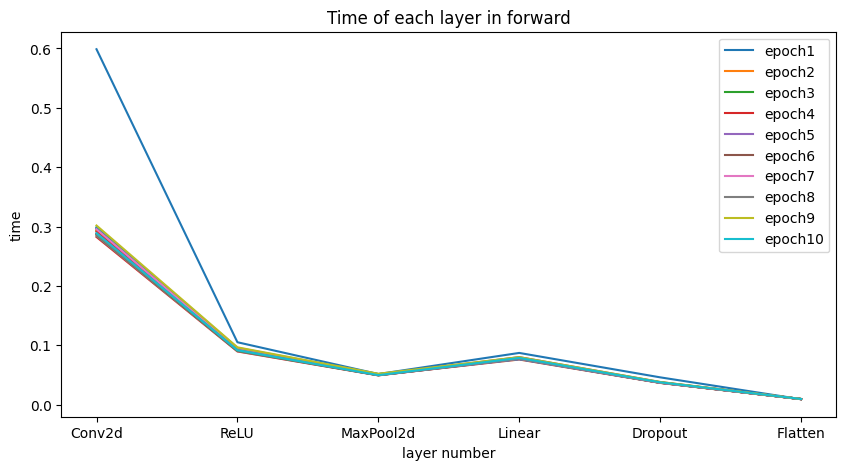

In [12]:
# plot time forward of each epoch in one figure
plt.figure(figsize=(10, 5))
for i in range(len(time_forward)):
    plt.plot(['Conv2d','ReLU','MaxPool2d','Linear','Dropout','Flatten'],time_forward[i])
plt.xlabel('layer number')
plt.ylabel('time')
plt.title('Time of each layer in forward')
plt.legend(['epoch1','epoch2','epoch3','epoch4','epoch5','epoch6','epoch7','epoch8','epoch9','epoch10'])
plt.show()

[0.30679238 0.0930853  0.05025772 0.07803743 0.03752923 0.00922323]
0.5749252915382385


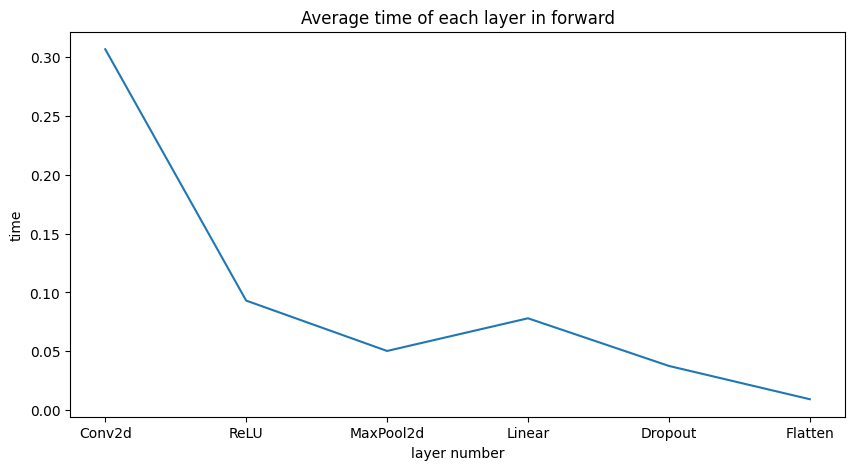

In [13]:
# calculate average time of each layer in forward for 10 epochs
time_forward_mean = np.mean(time_forward, axis=0)
print(time_forward_mean)
print(np.sum(time_forward_mean))

# plot average time of each layer in forward for 10 epochs
plt.figure(figsize=(10, 5))
plt.plot(['Conv2d','ReLU','MaxPool2d','Linear','Dropout','Flatten'],time_forward_mean)
plt.xlabel('layer number')
plt.ylabel('time')
plt.title('Average time of each layer in forward')
plt.show()

#### time_round

In [14]:
time_round

array([[1.89582515, 0.89699006, 0.07393169, 0.8366096 , 0.11032629,
        2.84555626],
       [1.89942431, 0.54779673, 0.05518675, 0.58306766, 0.09714484,
        2.87416577],
       [1.90760684, 0.55828738, 0.05451298, 0.60093498, 0.10437107,
        2.88428807],
       [1.90708113, 0.54389548, 0.04957867, 0.59477615, 0.10197997,
        2.87410426],
       [1.90321302, 0.55014229, 0.0509057 , 0.60187483, 0.10077024,
        2.91015196],
       [1.91447449, 0.56767845, 0.05369401, 0.60575104, 0.10498428,
        2.888592  ],
       [1.91307616, 0.56372738, 0.05298352, 0.60420418, 0.10338473,
        2.89238954],
       [1.90374565, 0.54683757, 0.04951191, 0.60788321, 0.10307193,
        2.89812613],
       [1.90572596, 0.56138587, 0.05364013, 0.60597825, 0.104774  ,
        2.88789153],
       [1.91457653, 0.57012939, 0.04994798, 0.60358262, 0.10379052,
        2.91053486],
       [1.91076541, 0.56449318, 0.05256701, 0.60598707, 0.10304236,
        2.89055467],
       [1.92141819, 0

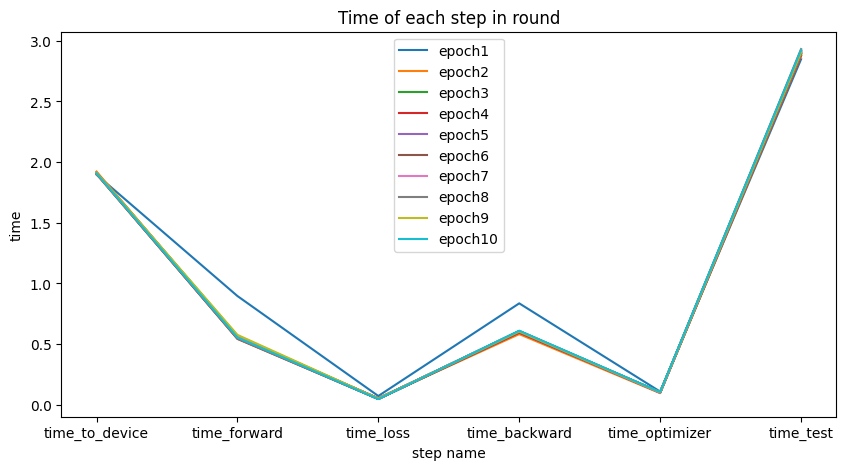

In [15]:
# the column of time_round is time_to_device, time_forward, time_loss, time_backward, time_optimizer, time_test
# plot time of each step in one figure
plt.figure(figsize=(10, 5))
for i in range(len(time_round)):
    plt.plot(['time_to_device','time_forward','time_loss','time_backward','time_optimizer','time_test'],time_round[i])
plt.xlabel('step name')
plt.ylabel('time')
plt.title('Time of each step in round')
plt.legend(['epoch1','epoch2','epoch3','epoch4','epoch5','epoch6','epoch7','epoch8','epoch9','epoch10'])
plt.show()

[1.90814593 0.57492529 0.05269283 0.61529163 0.10367991 2.89789752]
6.152633106708527


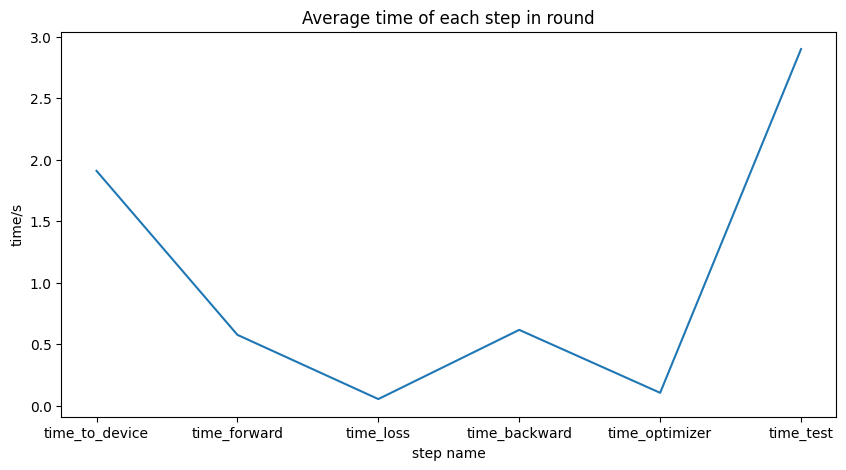

In [16]:
# calculate average time of each step in round for 10 epochs
time_round_mean = np.mean(time_round, axis=0)
time_round_mean.shape
print(time_round_mean)
print(np.sum(time_round_mean))

# plot average time of each step in round for 10 epochs
plt.figure(figsize=(10, 5))
plt.plot(['time_to_device','time_forward','time_loss','time_backward','time_optimizer','time_test'],time_round_mean)
plt.xlabel('step name')
plt.ylabel('time/s')
plt.title('Average time of each step in round')
plt.show()

#### time_epoch

In [17]:
time_epoch

array([[ 1.        , 49.19019556],
       [ 2.        , 48.82736111],
       [ 3.        , 49.05926299],
       [ 4.        , 49.17564511],
       [ 5.        , 49.27827048],
       [ 6.        , 49.3755486 ],
       [ 7.        , 49.39823556],
       [ 8.        , 49.33143592],
       [ 9.        , 49.40453982],
       [10.        , 49.43203664],
       [11.        , 49.47626305],
       [12.        , 49.47726536],
       [13.        , 49.46333647],
       [14.        , 49.46429849],
       [15.        , 49.44848776],
       [16.        , 49.51685452],
       [17.        , 49.54309821],
       [18.        , 49.5515902 ],
       [19.        , 49.6170373 ],
       [20.        , 49.56146193]])

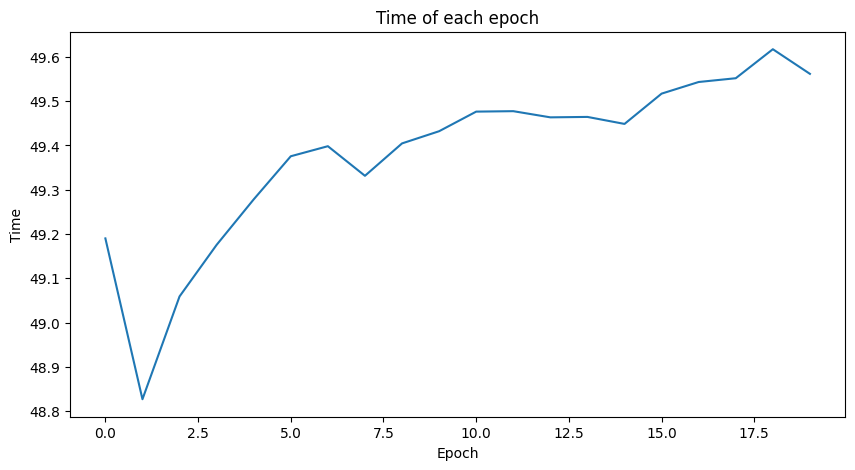

In [18]:
# plot time of each epoch in one figure
plt.figure(figsize=(10, 5))
plt.plot(time_epoch[:, 1])
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time of each epoch')
plt.show()

#### combined plot

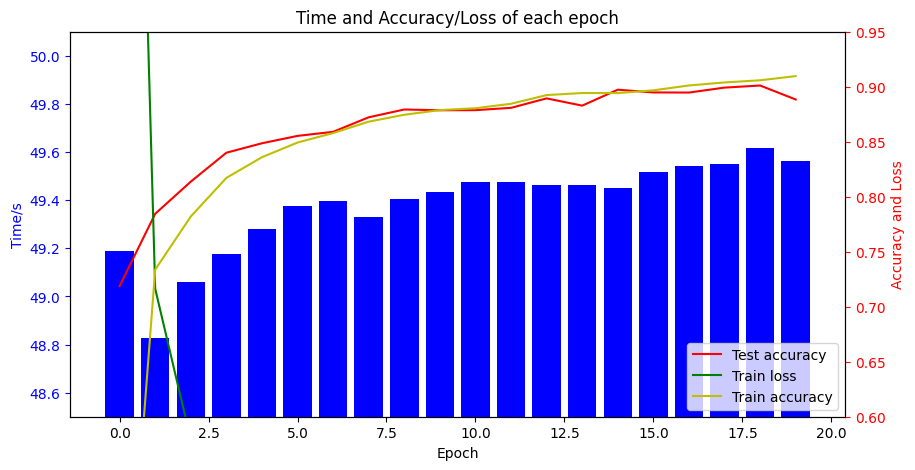

In [19]:
# plot the time_epoch, the y axis set to left, and the value between 49 and 49.6, using bar chart
# plot the test_acc, train_loss_mean, train_acc_mean, the y axis set to right, using line chart
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(np.arange(time_epoch.shape[0]), time_epoch[:, 1], color='b')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Time/s', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim([48.5, 50.1])
ax2 = ax1.twinx()
ax2.plot(test_acc, color='r')
ax2.plot(train_loss_mean, color='g')
ax2.plot(train_acc_mean, color='y')
ax2.set_ylabel('Accuracy and Loss', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim([0.6, 0.95])
plt.title('Time and Accuracy/Loss of each epoch')
plt.legend(['Test accuracy','Train loss','Train accuracy'])
plt.show()

#### energy_epoch

In [20]:
energy_epoch.shape
# change energy_epoch to float
energy_epoch_f = energy_epoch.astype(float)
energy_epoch_f = energy_epoch_f.reshape(1, -1)
energy_epoch_f.shape
energy_epoch_f = energy_epoch_f[0]
print(energy_epoch_f)

print(min(energy_epoch_f))
print(max(energy_epoch_f))

[3823.69 3813.7  3929.54 3949.28 3923.17 3935.84 3939.39 3936.1  3945.88
 3933.66 3941.8  3933.29 3926.37 3935.38 3935.3  3936.45 3937.7  3934.39
 3933.62 3938.54]
3813.7
3949.28


/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_37455/3511519396.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  energy_epoch_f = energy_epoch.astype(float)


In [21]:
# calculate the total energy of 30 epochs
energy_total = np.sum(energy_epoch_f)
print(energy_total)

# the unit is J, change it to kWh
energy_total_kWh = energy_total / 3600000
print(energy_total_kWh)

78483.08999999998
0.02180085833333333


In [22]:
energy_mean = np.mean(energy_epoch_f)
energy_mean

3924.154499999999

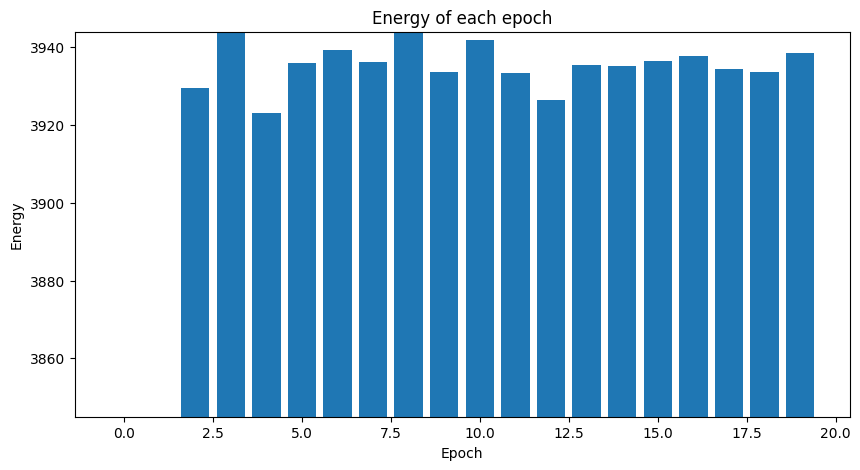

In [23]:
# plot the energy_epoch using bar chart, set the y axis value between 3845 to 3944
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(energy_epoch_f)), energy_epoch_f)
plt.xlabel('Epoch')
plt.ylabel('Energy')
plt.title('Energy of each epoch')
plt.ylim([3845, 3944])
plt.show()

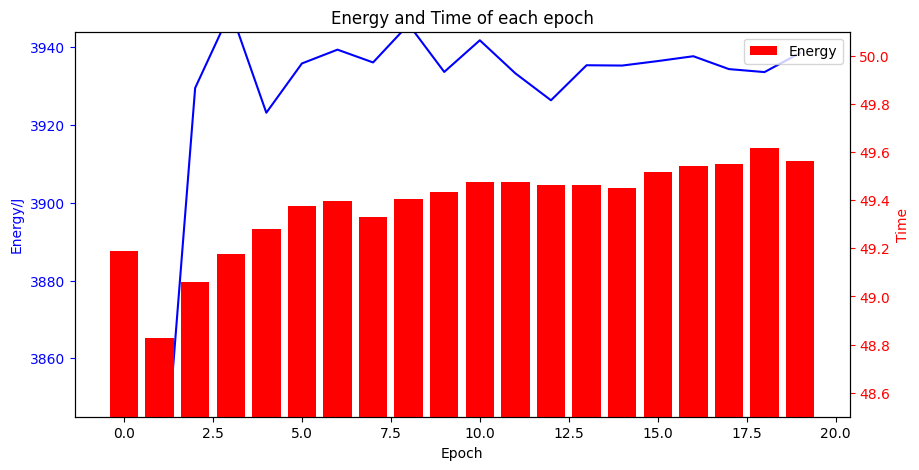

In [24]:
# plot the energy_epoch, the y axis set to right, and the value between 3845 to 3944, using line chart
# plot the time_epoch, the y axis set to left, and the value between 49 and 49.6, using bar chart
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(energy_epoch_f, color='b')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Energy/J', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim([3845, 3944])
ax2 = ax1.twinx()
ax2.bar(np.arange(time_epoch.shape[0]), time_epoch[:, 1], color='r')
ax2.set_ylabel('Time', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim([48.5, 50.1])
plt.title('Energy and Time of each epoch')
plt.legend(['Energy','Time'])
plt.show()

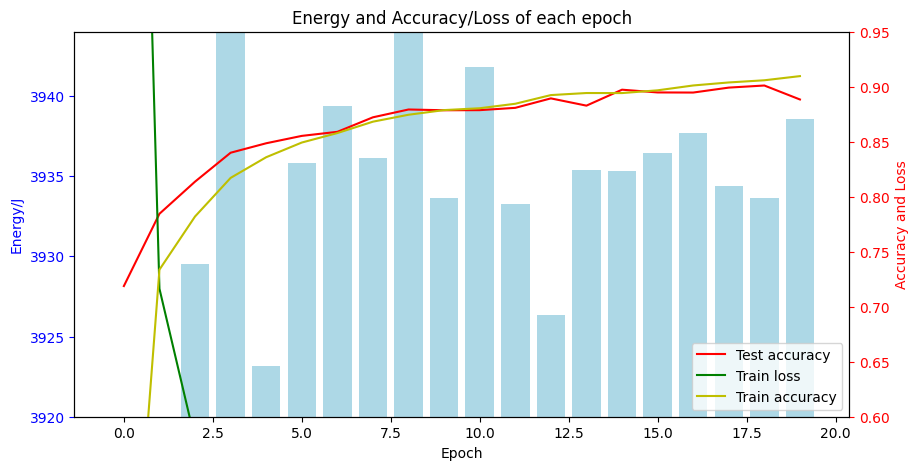

In [25]:
# plot the energy_epoch, the y axis set to right, and the value between 3845 to 3944, using bar chart
# plot the test_acc, train_loss_mean, train_acc_mean, the y axis set to left, and the value between 0.6 to 0.95, using line chart
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(np.arange(len(energy_epoch_f)), energy_epoch_f, color='lightblue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Energy/J', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim([3920, 3944])
ax2 = ax1.twinx()
ax2.plot(test_acc, color='r')
ax2.plot(train_loss_mean, color='g')
ax2.plot(train_acc_mean, color='y')
ax2.set_ylabel('Accuracy and Loss', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim([0.6, 0.95])
plt.title('Energy and Accuracy/Loss of each epoch')
plt.legend(['Test accuracy','Train loss','Train accuracy'])
plt.show()